In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

figure3_processing_times.csv

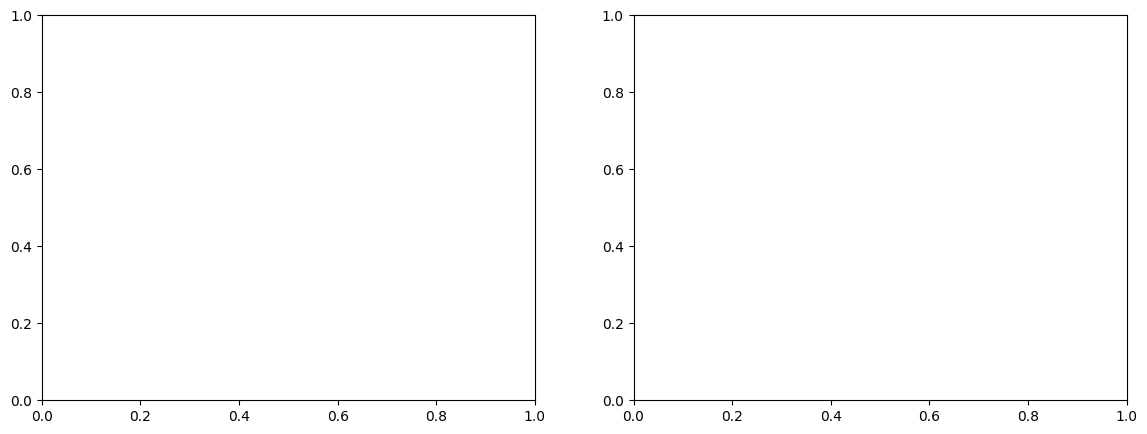

In [2]:
# Đọc dữ liệu từ file CSV
# File 1: Dữ liệu thực nghiệm (experiment_data.csv)
experiment_data = pd.read_csv('table2_queue_data.csv')

# File 2: Dữ liệu processing time (processing_time.csv)
# Cần xử lý format đặc biệt vì có tên frame trong cột đầu
processing_data = pd.read_csv('figure3_processing_times.csv')

processing_data['frame'] = (
    processing_data['frame_id']
    .str.extract(r'f(\d+)')
    .astype(int)
)

processing_data = (
    processing_data
    .rename(columns={'processing_time_seconds': 'time'})
    [['frame', 'time']]
    .sort_values('frame')
)


# Tạo figure với 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

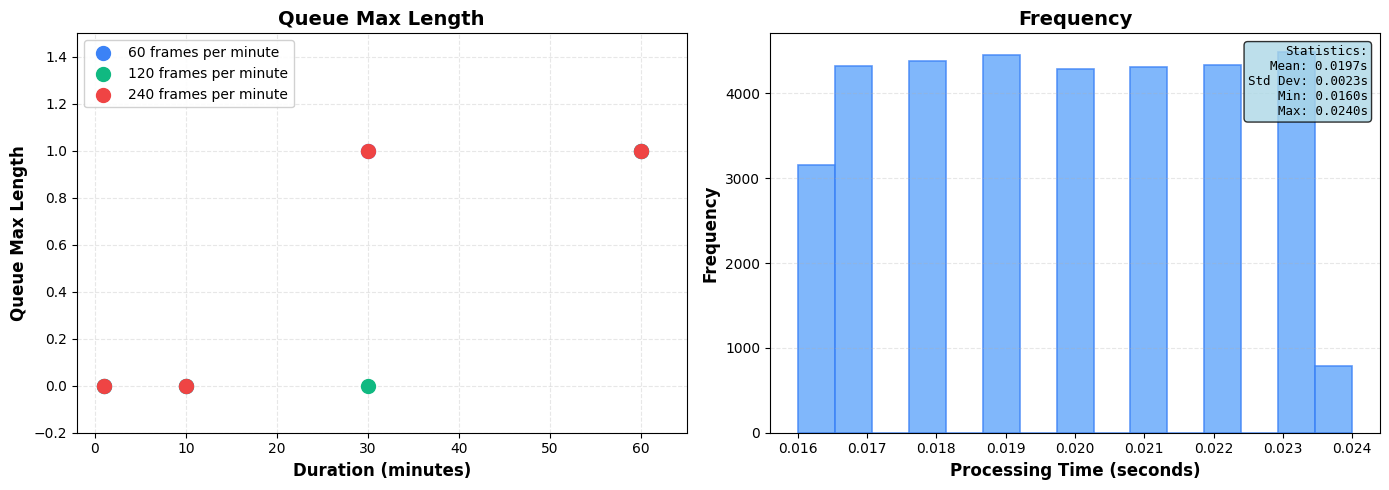

EXPERIMENT DATA STATISTICS
 duration  fps  frames_total  time_taken  max_queue_length
        1   60           580        1.00                 0
        1  120           629        1.00                 0
        1  240           630        1.01                 0
       10   60          5880       10.01                 0
       10  120          6054       10.02                 0
       10  240          5992       10.01                 0
       30   60         17610       30.00                 1
       30  120         18100       30.00                 0
       30  240         17840       30.33                 1
       60   60         34520       60.00                 1
       60  120         37446       60.01                 1
       60  240         36331       60.01                 1

PROCESSING TIME STATISTICS
Total frames: 34520
Frame range: 1 - 34520
Mean: 0.0197 seconds
Standard Deviation: 0.0023 seconds
Min: 0.0160 seconds
Max: 0.0240 seconds
Median: 0.0200 seconds


In [3]:
# Đọc dữ liệu từ file CSV
# File 1: Dữ liệu thực nghiệm (experiment_data.csv)
experiment_data = pd.read_csv('table2_queue_data.csv')

# File 2: Dữ liệu processing time (processing_time.csv)
# Cần xử lý format đặc biệt vì có tên frame trong cột đầu
processing_data = pd.read_csv('figure3_processing_times.csv')

processing_data['frame'] = (
    processing_data['frame_id']
    .str.extract(r'f(\d+)')
    .astype(int)
)

processing_data = (
    processing_data
    .rename(columns={'processing_time_seconds': 'time'})
    [['frame', 'time']]
    .sort_values('frame')
)


# Tạo figure với 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
# ===== Biểu đồ 1: Queue Max Length vs Duration =====
# Nhóm dữ liệu theo FPS
fps_60 = experiment_data[experiment_data['fps'] == 60]
fps_120 = experiment_data[experiment_data['fps'] == 120]
fps_240 = experiment_data[experiment_data['fps'] == 240]

# Vẽ scatter plot
ax1.scatter(fps_60['duration'], fps_60['max_queue_length'], 
           s=100, color='#3B82F6', label='60 frames per minute', zorder=3)
ax1.scatter(fps_120['duration'], fps_120['max_queue_length'], 
           s=100, color='#10B981', label='120 frames per minute', zorder=3)
ax1.scatter(fps_240['duration'], fps_240['max_queue_length'], 
           s=100, color='#EF4444', label='240 frames per minute', zorder=3)

ax1.set_xlabel('Duration (minutes)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Queue Max Length', fontsize=12, fontweight='bold')
ax1.set_title('Queue Max Length', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left', framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_xlim(-2, 65)
ax1.set_ylim(-0.2, max(experiment_data['max_queue_length']) + 0.5)
# ===== Biểu đồ 2: Processing Time Frequency (Histogram) =====
# Tạo histogram
ax2.hist(processing_data['time'], bins=15, color='#60A5FA', 
         edgecolor='#3B82F6', linewidth=1.2, alpha=0.8)

ax2.set_xlabel('Processing Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Frequency', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

# Thêm statistics box
stats_text = f"""Statistics:
Mean: {processing_data['time'].mean():.4f}s
Std Dev: {processing_data['time'].std():.4f}s
Min: {processing_data['time'].min():.4f}s
Max: {processing_data['time'].max():.4f}s"""

ax2.text(0.98, 0.97, stats_text, transform=ax2.transAxes,
        verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8),
        fontsize=9, family='monospace')

# Điều chỉnh layout
plt.tight_layout()
plt.savefig('visualization.png', dpi=300, bbox_inches='tight')
plt.show()

# In ra thống kê
print("="*60)
print("EXPERIMENT DATA STATISTICS")
print("="*60)
print(experiment_data.to_string(index=False))
print("\n" + "="*60)
print("PROCESSING TIME STATISTICS")
print("="*60)
print(f"Total frames: {len(processing_data)}")
print(f"Frame range: {processing_data['frame'].min()} - {processing_data['frame'].max()}")
print(f"Mean: {processing_data['time'].mean():.4f} seconds")
print(f"Standard Deviation: {processing_data['time'].std():.4f} seconds")
print(f"Min: {processing_data['time'].min():.4f} seconds")
print(f"Max: {processing_data['time'].max():.4f} seconds")
print(f"Median: {processing_data['time'].median():.4f} seconds")
print("="*60)
